In [35]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False # 设置负号显示正常

%config InlineBackend.figure_format = 'svg' # 设置图像清晰度

order_df = pd.read_excel(f"E:\Python\data_analys\data_analys\某电商平台2021年订单数据.xlsx",index_col="id")
order_df.head(5) # 查看前5行数据

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\22746\AppData\Local\Temp\ipykernel_20784\4105353450.py:7: SyntaxWarning: invalid escape sequence '\P'
  order_df = pd.read_excel(f"E:\Python\data_analys\data_analys\某电商平台2021年订单数据.xlsx",index_col="id")


,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2020-254118088,customer-157213,JDG-00006491,495.67,495.67,渠道-39,APP,2020-02-14 12:20:36,2021-02-28 13:38:41,False
2,sys-2020-263312190,customer-191121,JDG-00058390,634.04,634.04,渠道-76,微 信,2020-08-14 09:40:34,2021-01-01 14:47:14,True
3,sys-2020-188208169,customer-211918,JDG-00008241,953.73,939.28,渠道-53,薇·信,2020-11-02 20:17:25,2021-01-19 20:06:35,False
4,sys-2020-203314910,customer-201322,JDG-00030253,857.54,760.15,渠道-53,WEB,2020-11-19 10:36:39,2021-08-07 12:24:35,False
5,sys-2020-283989279,customer-120872,JDG-00029046,803.87,795.61,渠道-52,APP,2020-12-26 11:19:16,2021-10-01 07:42:43,False


In [36]:
order_df.info() # 查看数据类型和缺失值情况

<class 'pandas.core.frame.DataFrame'>
Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104557 non-null  object        
 1   userID        104557 non-null  object        
 2   goodsID       104557 non-null  object        
 3   orderAmount   104557 non-null  float64       
 4   payment       104557 non-null  float64       
 5   chanelID      104549 non-null  object        
 6   platfromType  104557 non-null  object        
 7   orderTime     104557 non-null  datetime64[ns]
 8   payTime       104557 non-null  datetime64[ns]
 9   chargeback    104557 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.1+ MB


In [37]:
# 删除非2021年的数据
index = order_df[order_df["payTime"].dt.year != 2021].index
order_df.drop(index = index,inplace = True)
order_df.shape

(104279, 10)

In [38]:
# 重命名列名
order_df.rename(columns={"chanelID":"channelID","platfromType":"platformType"},inplace = True)
order_df.info() # 查看数据类型和缺失值情况

<class 'pandas.core.frame.DataFrame'>
Index: 104279 entries, 1 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104279 non-null  object        
 1   userID        104279 non-null  object        
 2   goodsID       104279 non-null  object        
 3   orderAmount   104279 non-null  float64       
 4   payment       104279 non-null  float64       
 5   channelID     104271 non-null  object        
 6   platformType  104279 non-null  object        
 7   orderTime     104279 non-null  datetime64[ns]
 8   payTime       104279 non-null  datetime64[ns]
 9   chargeback    104279 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.1+ MB


In [39]:
# 处理业务流程不符的数据（支付时间早于下单时间）
order_df.drop(index=order_df[order_df["payTime"] < order_df["orderTime"]].index,inplace=True)
order_df.info() # 查看数据类型和缺失值情况
order_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 104274 entries, 1 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104274 non-null  object        
 1   userID        104274 non-null  object        
 2   goodsID       104274 non-null  object        
 3   orderAmount   104274 non-null  float64       
 4   payment       104274 non-null  float64       
 5   channelID     104266 non-null  object        
 6   platformType  104274 non-null  object        
 7   orderTime     104274 non-null  datetime64[ns]
 8   payTime       104274 non-null  datetime64[ns]
 9   chargeback    104274 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.1+ MB


(104274, 10)

In [40]:
# 删除订单金额、支付金额小于0
order_df.drop(index=order_df[(order_df["orderAmount"] < 0) | (order_df["payment"] < 0)].index,inplace=True)
order_df.shape

(104264, 10)

In [41]:
# 支付时间超过30min
order_df.drop(index = order_df[order_df["payTime"] - order_df["orderTime"] > pd.Timedelta(minutes=30)].index,inplace=True)
order_df.shape
order_df.info() # 查看数据类型和缺失值情况

<class 'pandas.core.frame.DataFrame'>
Index: 103344 entries, 6 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       103344 non-null  object        
 1   userID        103344 non-null  object        
 2   goodsID       103344 non-null  object        
 3   orderAmount   103344 non-null  float64       
 4   payment       103344 non-null  float64       
 5   channelID     103336 non-null  object        
 6   platformType  103344 non-null  object        
 7   orderTime     103344 non-null  datetime64[ns]
 8   payTime       103344 non-null  datetime64[ns]
 9   chargeback    103344 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.0+ MB


In [42]:
# 处理渠道为空的数据（填充众数）
order_df["channelID"].fillna(order_df["channelID"].mode()[0],inplace=True) # [0] 取第一个众数值（如果有多个众数）
order_df.info() # 查看数据类型和缺失值情况


<class 'pandas.core.frame.DataFrame'>
Index: 103344 entries, 6 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       103344 non-null  object        
 1   userID        103344 non-null  object        
 2   goodsID       103344 non-null  object        
 3   orderAmount   103344 non-null  float64       
 4   payment       103344 non-null  float64       
 5   channelID     103344 non-null  object        
 6   platformType  103344 non-null  object        
 7   orderTime     103344 non-null  datetime64[ns]
 8   payTime       103344 non-null  datetime64[ns]
 9   chargeback    103344 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.0+ MB


C:\Users\22746\AppData\Local\Temp\ipykernel_20784\2955821180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_df["channelID"].fillna(order_df["channelID"].mode()[0],inplace=True) # [0] 取第一个众数值（如果有多个众数）


In [43]:
# 处理平台类型字段（处理异常值）
platformType = order_df["platformType"].replace(r'[\s·]','',regex=True) # 去除空格和小数点
# 查看平台去重数据
# platformType.unique() # 查看去重数据
platformType = platformType.str.title()
# 查看去重数据
# platformType.unique() # 查看去重数据
order_df["platformType"] = platformType.replace(['薇信','Vx','网页','网站'],['微信','微信','Web','Web'])
# order_df["platformType"].unique() # 查看去重数据


In [44]:
# 添加折扣字段，处理折旧>1的数据，并将支付金额=订单金额*平均折扣

order_df["discount"] =  order_df["payment"] / order_df["orderAmount"]
mead_discount = order_df[order_df["discount"]<=1]["discount"].mean()
mead_discount
# order_df.head(20)

np.float64(0.9389702485891127)

In [45]:
import numpy as np

order_df["payment"] = np.round(order_df["payment"].where(order_df["discount"]<=1,order_df["orderAmount"] * mead_discount),2)
order_df["discount"] = order_df["payment"] / order_df["orderAmount"]
order_df.head(20)


,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
6,sys-2021-279103297,customer-146548,JDG-00056475,667.33,667.33,渠道-76,微信,2021-01-01 00:12:23,2021-01-01 00:13:37,False,1.000000
7,sys-2021-316686066,customer-104210,JDG-00070902,1834.13,1776.80,渠道-39,微信,2021-01-01 00:23:06,2021-01-01 00:23:32,False,0.968743
8,sys-2021-306447069,customer-104863,JDG-00049963,837.32,818.33,渠道-00,微信,2021-01-01 01:05:50,2021-01-01 01:06:17,False,0.977320
9,sys-2021-290267674,customer-206155,JDG-00025318,1144.50,1092.45,渠道-33,App,2021-01-01 01:16:12,2021-01-01 01:16:25,False,0.954522
10,sys-2021-337079027,customer-137939,JDG-00076876,641.93,641.93,渠道-52,支付宝,2021-01-01 01:31:00,2021-01-01 01:31:36,False,1.000000
11,sys-2021-417411381,customer-181957,JDG-00048356,271.45,271.45,渠道-00,App,2021-01-01 01:36:17,2021-01-01 01:36:56,False,1.000000
12,sys-2021-254286596,customer-174586,JDG-00032245,827.13,827.13,渠道-28,微信,2021-01-01 01:37:00,2021-01-01 01:37:14,False,1.000000
13,sys-2021-303647260,customer-178023,JDG-00068545,1302.55,1246.52,渠道-76,App,2021-01-01 02:11:23,2021-01-01 02:12:56,False,0.956984
14,sys-2021-347419495,customer-209896,JDG-00048355,652.87,598.84,渠道-39,App,2021-01-01 02:31:13,2021-01-01 02:32:40,False,0.917242


In [46]:
# 数据分析和呈现
# 1.交易总金额GMV、总销售额、实际销售额、退货率、客单价（全年）
total_gmv = order_df["orderAmount"].sum()/10000 # GMV
total_pay = order_df["payment"].sum()/10000 # 总销售额
total_rev = order_df.query("not chargeback")["payment"].sum()/10000 # 实际销售额
print(f"GMV: {total_gmv:.2f}万元")
print(f"总销售额: {total_pay:.2f}万元")
print(f"实际销售额: {total_rev:.2f}万元")

GMV: 12709.88万元
总销售额: 12122.65万元
实际销售额: 10509.44万元


In [47]:
back_ratio = order_df.query("chargeback")["orderID"].nunique() / order_df["orderID"].nunique() # 拒退率
# 付费用户平均收益：ARPU（Average Revenue Per Paid User）= 总销售额 / 付费用户数
arppu = total_pay / order_df["userID"].nunique() # 客单价
print(f"拒退率:{back_ratio * 100:.2f}%")
print(f"客单价:{arppu*10000:.2f}元")

拒退率:13.18%
客单价:1541.34元


In [48]:
# 新增月份和季度字段,月份格式为1月，季度格式为Q1
order_df["month"] = order_df["orderTime"].dt.month.apply(lambda x: str(x) + "月")
order_df["quarter"] = order_df["orderTime"].dt.quarter.apply(lambda x: "Q" + str(x))
order_df


,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount,month,quarter
id,,,,,,,,,,,,,
6,sys-2021-279103297,customer-146548,JDG-00056475,667.33,667.33,渠道-76,微信,2021-01-01 00:12:23,2021-01-01 00:13:37,False,1.000000,1月,Q1
7,sys-2021-316686066,customer-104210,JDG-00070902,1834.13,1776.80,渠道-39,微信,2021-01-01 00:23:06,2021-01-01 00:23:32,False,0.968743,1月,Q1
8,sys-2021-306447069,customer-104863,JDG-00049963,837.32,818.33,渠道-00,微信,2021-01-01 01:05:50,2021-01-01 01:06:17,False,0.977320,1月,Q1
9,sys-2021-290267674,customer-206155,JDG-00025318,1144.50,1092.45,渠道-33,App,2021-01-01 01:16:12,2021-01-01 01:16:25,False,0.954522,1月,Q1
10,sys-2021-337079027,customer-137939,JDG-00076876,641.93,641.93,渠道-52,支付宝,2021-01-01 01:31:00,2021-01-01 01:31:36,False,1.000000,1月,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2021-344079195,customer-182248,JDG-00081381,1029.81,964.59,渠道-89,微信,2021-12-31 23:32:55,2021-12-31 23:33:06,False,0.936668,12月,Q4
104298,sys-2021-296195955,customer-143322,JDG-00093851,1731.61,1580.83,渠道-00,App,2021-12-31 23:33:05,2021-12-31 23:34:36,True,0.912925,12月,Q4
104299,sys-2021-382387725,customer-220484,JDG-00078257,3624.84,3571.55,渠道-53,Web,2021-12-31 23:37:30,2021-12-31 23:37:44,False,0.985299,12月,Q4


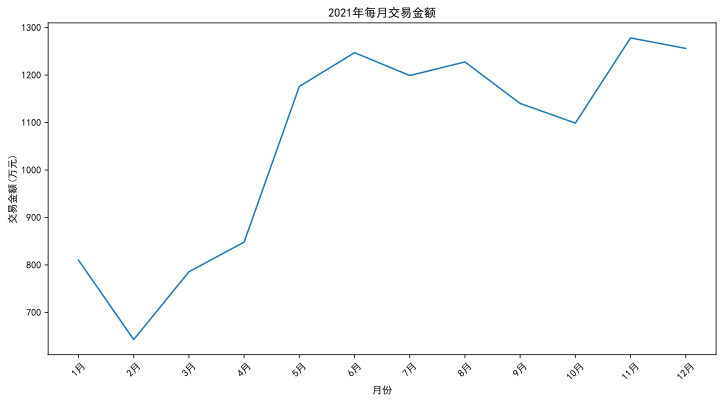

In [51]:

# 月交易金额折线图
ser = np.round(order_df.groupby("month")["orderAmount"].sum()/10000,2) # 交易金额
# ser = ser.sort_index(key = lambda x: x.str.extract('(\d+)').astype(int)) # 按1月、2月...份排序
# 报错:x.str.extract('(\d+)') 返回的是一个 DataFrame（二维结构），而 sort_index(key=...) 需要一维数据。
ser = ser.iloc[pd.to_numeric(ser.index.str.replace('月','')).argsort()]

plt.figure(figsize=(12,6))
plt.plot(ser.index,ser.values)
plt.title("2021年每月交易金额")
plt.xlabel("月份")
plt.ylabel("交易金额(万元)")
plt.xticks(rotation=45)
plt.show()





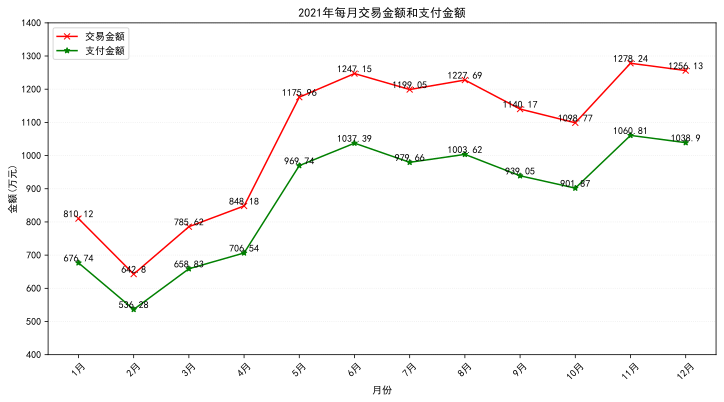

In [54]:
ser1 = round(order_df.groupby('month')['orderAmount'].sum()/10000,2) # 交易金额
ser2 = round(order_df.query('not chargeback').groupby('month')['payment'].sum()/10000,2) # 支付金额

ser1 = ser1.iloc[pd.to_numeric(ser1.index.str.replace('月','')).argsort()]
ser2 = ser2.iloc[pd.to_numeric(ser2.index.str.replace('月','')).argsort()]

plt.figure(figsize = (12,6))
plt.plot(ser1.index,ser1.values,marker = 'x',color='red',label = "交易金额")
plt.plot(ser2.index,ser2.values,marker = '*',color='green',label = "支付金额")
for index in ser1.index:
    plt.text(index,ser1[index],ser1[index],ha='center',va='bottom')
for index in ser2.index:
    plt.text(index,ser2[index],ser2[index],ha='center',va='bottom')
plt.yticks(np.arange(400,1401,100))
plt.xticks(ser1.index,rotation=45)
plt.legend()
plt.grid(axis = 'y',linestyle = ':',alpha = 0.25)
plt.title("2021年每月交易金额和支付金额")
plt.xlabel("月份")
plt.ylabel("金额(万元)")
plt.show()

In [56]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

document.add_picture('monty-truth.png', width=Inches(1.25))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('demo.docx')

ModuleNotFoundError: No module named 'docx'